# Explore here

In [18]:
# 1. Import Libraries
import pandas as pd  # data manipulation
import numpy as np  # numerical operations
from sklearn.model_selection import train_test_split  # split data
from sklearn.cluster import KMeans  # clustering model
import matplotlib.pyplot as plt  # plotting
from sklearn.linear_model import LogisticRegression  # classification model
from sklearn.metrics import classification_report  # evaluate model
import os
import joblib


# Set random seed for reproducibility
np.random.seed(42)


In [4]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"
df = pd.read_csv(url)

In [5]:
display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()


MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [14]:
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [7]:
df = df[['Longitude', 'Latitude', 'MedInc']]


In [8]:
display(df.head())

,Longitude,Latitude,MedInc
0,-122.23,37.88,8.3252
1,-122.22,37.86,8.3014
2,-122.24,37.85,7.2574
3,-122.25,37.85,5.6431
4,-122.25,37.85,3.8462


In [9]:
# Split dataset
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)



train unsupervised

In [10]:
kmeans = KMeans(n_clusters=6, random_state=42)
train_data['cluster'] = kmeans.fit_predict(train_data[['Longitude', 'Latitude', 'MedInc']])


In [11]:
display(train_data.head()) 

,Longitude,Latitude,MedInc,cluster
14196,-117.03,32.71,3.2596,3
8267,-118.16,33.77,3.8125,1
17445,-120.48,34.66,4.1563,1
14265,-117.11,32.69,1.9425,3
2271,-119.80,36.78,3.5542,5


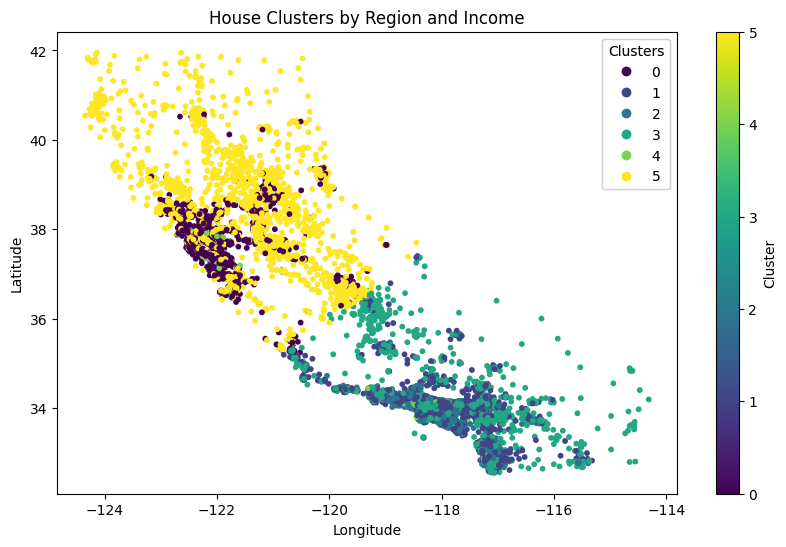

In [12]:
# Visualize clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(train_data['Longitude'], train_data['Latitude'], 
                      c=train_data['cluster'], s=10, cmap='viridis')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("House Clusters by Region and Income")

# Add a legend with cluster labels
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.colorbar(scatter, label="Cluster")
plt.show()

In [13]:
# Predict clusters for test set
test_data['cluster'] = kmeans.predict(test_data[['Longitude', 'Latitude', 'MedInc']])
display(test_data.head())  

,Longitude,Latitude,MedInc,cluster
20046,-119.01,36.06,1.6812,3
3024,-119.46,35.14,2.5313,3
15663,-122.44,37.80,3.4801,5
20484,-118.72,34.28,5.7376,2
9814,-121.93,36.62,3.7250,5


C:\Users\aless\AppData\Local\Temp\ipykernel_724052\1131088341.py:5: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(test_data['Longitude'], test_data['Latitude'],


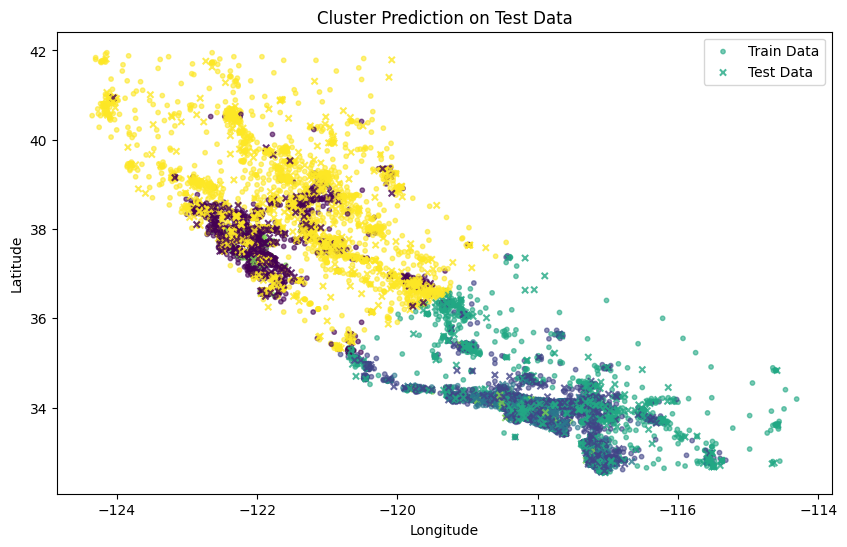

In [14]:
# Plot with test points
plt.figure(figsize=(10, 6))
plt.scatter(train_data['Longitude'], train_data['Latitude'], 
            c=train_data['cluster'], s=10, cmap='viridis', label="Train Data", alpha=0.6)
plt.scatter(test_data['Longitude'], test_data['Latitude'], 
            c=test_data['cluster'], s=20, cmap='viridis', marker='x', label="Test Data", edgecolor='k', alpha=0.8)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Cluster Prediction on Test Data")
plt.legend()
plt.show()

train supervised

In [19]:
# Prepare data for classification
X_train = train_data[['Longitude', 'Latitude', 'MedInc']]
y_train = train_data['cluster']
X_test = test_data[['Longitude', 'Latitude', 'MedInc']]
y_test = test_data['cluster']

In [20]:
# Train logistic regression model
classifier = LogisticRegression(random_state=42, max_iter=200)
classifier.fit(X_train, y_train)

c:\Users\aless\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=42)

In [ ]:
#  Evaluate model
y_pred = classifier.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))  

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       561
           1       0.98      0.98      0.98       983
           2       0.95      0.95      0.95       299
           3       0.97      0.97      0.97      1111
           4       1.00      0.89      0.94        62
           5       0.96      0.96      0.96      1112

    accuracy                           0.97      4128
   macro avg       0.97      0.95      0.96      4128
weighted avg       0.97      0.97      0.97      4128



In [ ]:

model_dir = r"C:\Users\aless\Desktop\4 geeks projects\ale---K-means-Project-Tutorial\models"

# Save the KMeans model
kmeans_model_path = os.path.join(model_dir, "kmeans_model.joblib")
joblib.dump(kmeans, kmeans_model_path)

# Save the Linear Regression model
linear_regression_model_path = os.path.join(model_dir, "linear_regression_model.joblib")
joblib.dump(classifier, linear_regression_model_path)


KMeans model saved at: C:\Users\aless\Desktop\4 geeks projects\ale---K-means-Project-Tutorial\models\kmeans_model.joblib
Linear Regression model saved at: C:\Users\aless\Desktop\4 geeks projects\ale---K-means-Project-Tutorial\models\linear_regression_model.joblib
